# Create Latitude and Longitude Combinations 

In [1]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitud and longitud combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Include the "API_practice script

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yellowknife ca
bluff nz
buala sb
puerto narino co
hermanus za
college us
busselton au
rikitea pf
maridi sd
copiapo cl
okhotsk ru
samarai pg
mataura pf
bethel us
jamestown sh
turbat pk
ponta do sol cv
hermanus za
busselton au
avarua ck
nabire id
iralaya hn
pimenta bueno br
dikson ru
lhokseumawe id
punta arenas cl
hermanus za
sioux lookout ca
saskylakh ru
punta arenas cl
carnarvon au
buqayq sa
dikson ru
bahia honda cu
novita co
ushuaia ar
kharp ru
albany au
ketchikan us
belyye berega ru
severo-kurilsk ru
bengkulu id
mataura pf
kapaa us
shakawe bw
tasiilaq gl
kalomo zm
hermanus za
san jeronimo mx
carnarvon au
bengkulu id
thompson ca
halalo wf
chuy uy
esperance au
san patricio mx
coihaique cl
kapaa us
east london za
lazaro cardenas mx
carnduff ca
bontang id
albany au
erenhot cn
patos br
jalu ly
porto santo pt
upernavik gl
ushuaia ar
puerto ayora ec
tasiilaq gl
jamestown sh
ushuaia ar
aksu cn
rikitea pf
thompson ca
vila velha br
lodja cd
kodiak us
takoradi gh
ribeira grande pt
vaini to
prai

udachnyy ru
atuona pf
kavieng pg
cabo san lucas mx
port hardy ca
irbeyskoye ru
cidreira br
lorengau pg
tasiilaq gl
mar del plata ar
punta arenas cl
lagoa pt
geraldton au
mongu zm
qaanaaq gl
omboue ga
kolosovka ru
mataura pf
jumla np
pansemal in
dikson ru
belushya guba ru
meulaboh id
mocambique mz
salinopolis br
broome au
vaini to
rikitea pf
maltahohe na
muisne ec
ribeira grande pt
mataura pf
luderitz na
khuldabad in
khatanga ru
ushuaia ar
east london za
marystown ca
pisco pe
georgetown sh
seddon nz
esperance au
haines junction ca
pangnirtung ca
hobart au
lorengau pg
albany au
manesti ro
port elizabeth za
kyra ru
tiksi ru
albany au
kitgum ug
sarakhs ir
kaitangata nz
bordighera it
puerto escondido mx
tasiilaq gl
mandalgovi mn
bandarbeyla so
cidreira br
oranjemund na
bengkulu id
ushuaia ar
baker city us
port elizabeth za
hithadhoo mv
la ronge ca
bahir dar et
mataura pf
illoqqortoormiut gl
birao cf
teknaf bd
new norfolk au
taolanaro mg
buraydah sa
bridlington gb
bluff nz
longyearbyen sj
no

tsiroanomandidy mg
ushuaia ar
jamestown sh
bogorodskoye ru
saint-donat-de-montcalm ca
olafsvik is
avera pf
kapaa us
dongsheng cn
mataura pf
tuktoyaktuk ca
albany au
ushuaia ar
prince george ca
chokurdakh ru
upernavik gl
pacific grove us
saleaula ws
marcona pe
hobart au
barentsburg sj
nikolskoye ru
illoqqortoormiut gl
arraial do cabo br
punta arenas cl
ajdabiya ly
forbes au
yima cn
moranbah au
busselton au
provideniya ru
kapaa us
faanui pf
half moon bay us
puerto ayora ec
san ramon de la nueva oran ar
airai pw
ahuimanu us
eyl so
mataura pf
upernavik gl
walvis bay na
usinsk ru
norman wells ca
chuy uy
torrelavega es
ushuaia ar
belushya guba ru
hobart au
lebu cl
castro cl
magistralnyy ru
saldanha za
jamestown sh
barentsburg sj
porto seguro br
srednekolymsk ru
mys shmidta ru
barentsburg sj
tiksi ru
saint-augustin ca
vaini to
wabana ca
saldanha za
belushya guba ru
camargo bo
puerto ayora ec
arraial do cabo br
vaitupu wf
taolanaro mg
cururupu br
kargat ru
panzhihua cn
lugus ph
mataura pf
diks

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
import requests
requests.__version__

'2.25.1'

# Import Dependencies, and Initialize an Empty List and Counters

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | buala
Processing Record 4 of Set 1 | puerto narino
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | maridi
Processing Record 10 of Set 1 | copiapo
Processing Record 11 of Set 1 | okhotsk
Processing Record 12 of Set 1 | samarai
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | turbat
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | nabire
Processing Record 20 of Set 1 | iralaya
Processing Record 21 of Set 1 | pimenta bueno
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | lhokseumawe
Processin

Processing Record 38 of Set 4 | chokwe
Processing Record 39 of Set 4 | marathon
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | fuling
Processing Record 42 of Set 4 | evensk
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | martil
Processing Record 49 of Set 4 | ngunguru
Processing Record 50 of Set 4 | green river
Processing Record 1 of Set 5 | kodinsk
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | sakaiminato
Processing Record 4 of Set 5 | belmonte
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | ca mau
Processing Record 8 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 9 of Set 5 | misratah
Processing Record 10 of Set 5 | coquimbo

Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | bandarbeyla
Processing Record 31 of Set 8 | baker city
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | bahir dar
Processing Record 34 of Set 8 | birao
Processing Record 35 of Set 8 | teknaf
Processing Record 36 of Set 8 | bridlington
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | wamba
Processing Record 39 of Set 8 | yankton
Processing Record 40 of Set 8 | tamandare
Processing Record 41 of Set 8 | egvekinot
Processing Record 42 of Set 8 | virginia beach
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | meihekou
Processing Record 45 of Set 8 | dengfeng
Processing Record 46 of Set 8 | jiuquan
Processing Record 47 of Set 8 | bereda
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | tezu
Processing Record 50 of Set 8 | ucluelet
Processing Record 1 of Set 9 | vila do maio
Processing Record 2 of Set 9 | maxixe
Processi

Processing Record 18 of Set 12 | yushan
Processing Record 19 of Set 12 | tiznit
Processing Record 20 of Set 12 | conde
Processing Record 21 of Set 12 | fort-shevchenko
Processing Record 22 of Set 12 | manavgat
Processing Record 23 of Set 12 | itanhaem
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | maldonado
Processing Record 26 of Set 12 | kapoeta
Processing Record 27 of Set 12 | chicama
Processing Record 28 of Set 12 | puerto quijarro
Processing Record 29 of Set 12 | makung
City not found. Skipping...
Processing Record 30 of Set 12 | uwayl
City not found. Skipping...
Processing Record 31 of Set 12 | spirit river
Processing Record 32 of Set 12 | asau
Processing Record 33 of Set 12 | nara
Processing Record 34 of Set 12 | kayerkan
Processing Record 35 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 12 | havre-saint-pierre
Processing Record 37 of Set 12 | baldone
Processing Record 38 of Set 12 | umzimvubu
City not found. Skipping...
Pr

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,47.41,100,75,4.00,CA,2021-10-01 03:38:37
1,Bluff,-46.6000,168.3333,53.80,79,42,23.73,NZ,2021-10-01 03:38:38
2,Buala,-8.1450,159.5921,85.26,66,96,4.03,SB,2021-10-01 03:38:38
3,Puerto Narino,-3.7703,-70.3831,73.35,97,100,1.83,CO,2021-10-01 03:38:39
4,Hermanus,-34.4187,19.2345,56.80,88,99,11.97,ZA,2021-10-01 03:38:39
5,College,64.8569,-147.8028,37.38,72,75,5.75,US,2021-10-01 03:38:39
6,Busselton,-33.6500,115.3333,61.09,70,91,15.77,AU,2021-10-01 03:38:40
7,Rikitea,-23.1203,-134.9692,73.36,73,3,18.21,PF,2021-10-01 03:38:29
8,Maridi,4.9158,29.4742,65.34,98,99,3.40,SS,2021-10-01 03:38:40
9,Copiapo,-27.3667,-70.3333,49.69,40,0,1.39,CL,2021-10-01 03:38:40


In [12]:
# Reorder of the columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-01 03:38:37,62.4560,-114.3525,47.41,100,75,4.00
1,Bluff,NZ,2021-10-01 03:38:38,-46.6000,168.3333,53.80,79,42,23.73
2,Buala,SB,2021-10-01 03:38:38,-8.1450,159.5921,85.26,66,96,4.03
3,Puerto Narino,CO,2021-10-01 03:38:39,-3.7703,-70.3831,73.35,97,100,1.83
4,Hermanus,ZA,2021-10-01 03:38:39,-34.4187,19.2345,56.80,88,99,11.97
5,College,US,2021-10-01 03:38:39,64.8569,-147.8028,37.38,72,75,5.75
6,Busselton,AU,2021-10-01 03:38:40,-33.6500,115.3333,61.09,70,91,15.77
7,Rikitea,PF,2021-10-01 03:38:29,-23.1203,-134.9692,73.36,73,3,18.21
8,Maridi,SS,2021-10-01 03:38:40,4.9158,29.4742,65.34,98,99,3.40
9,Copiapo,CL,2021-10-01 03:38:40,-27.3667,-70.3333,49.69,40,0,1.39


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/30/21'

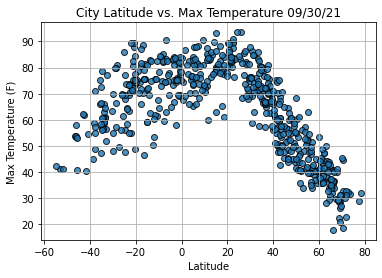

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

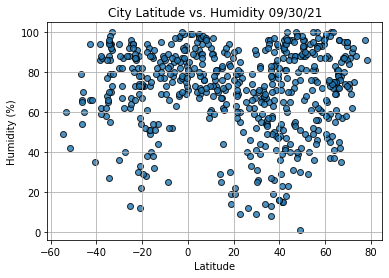

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

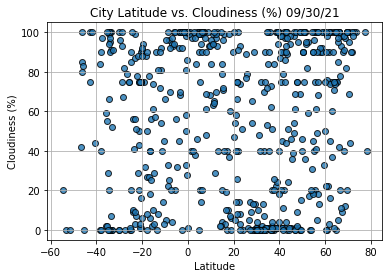

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

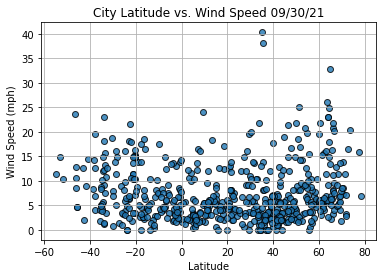

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a Linear Regression Function

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2021-10-01 03:38:42
Lat                       41.3712
Lng                       -73.414
Max Temp                     55.0
Humidity                       87
Cloudiness                      1
Wind Speed                    0.0
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-01 03:38:37,62.4560,-114.3525,47.41,100,75,4.00
5,College,US,2021-10-01 03:38:39,64.8569,-147.8028,37.38,72,75,5.75
8,Maridi,SS,2021-10-01 03:38:40,4.9158,29.4742,65.34,98,99,3.40
10,Okhotsk,RU,2021-10-01 03:38:41,59.3833,143.3000,35.64,94,100,10.47
13,Bethel,US,2021-10-01 03:38:42,41.3712,-73.4140,55.00,87,1,0.00
...,...,...,...,...,...,...,...,...,...
565,Panzhihua,CN,2021-10-01 03:42:06,26.5851,101.7128,81.61,62,5,1.30
566,Lugus,PH,2021-10-01 03:42:07,5.7036,120.8203,83.35,71,14,2.91
567,Rudbar,AF,2021-10-01 03:42:07,30.1500,62.6000,76.15,25,4,10.45
568,Jibuti,DJ,2021-10-01 03:42:07,11.5000,42.5000,83.62,59,100,5.73


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

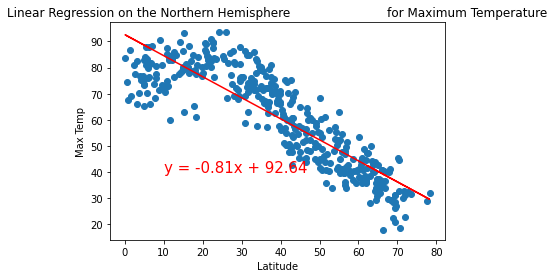

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [41]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

77.99098203859488 2.6120451781697325


In [44]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.021958


## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

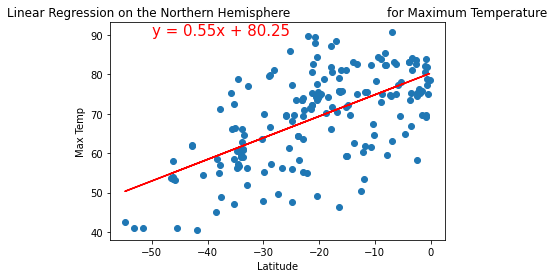

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [47]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

80.25126674373877 1.2786108573215156


In [48]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.377268


## Correlation between Latitude and Percent Humidity

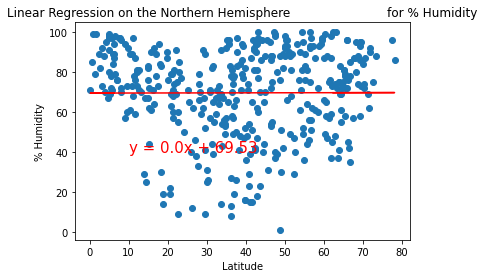

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10, 40))

In [50]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

69.53204684471652 2.4515097936682158


In [51]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.000008


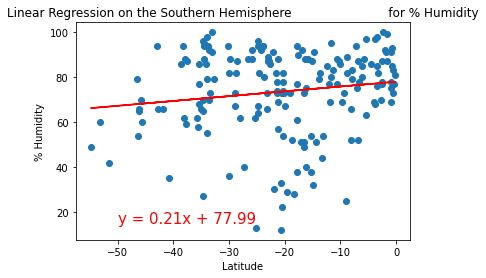

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [53]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

77.99098203859488 2.6120451781697325


In [54]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.021958


## Correlation Latitude and Percent Cloudiness

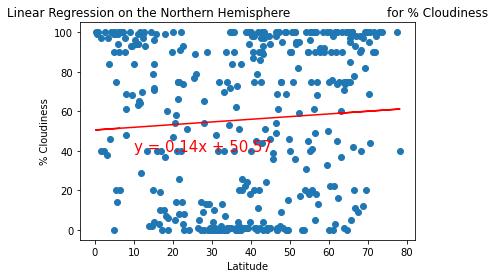

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 40))

In [56]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

50.56842980009129 4.375462198719096


In [57]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.004650


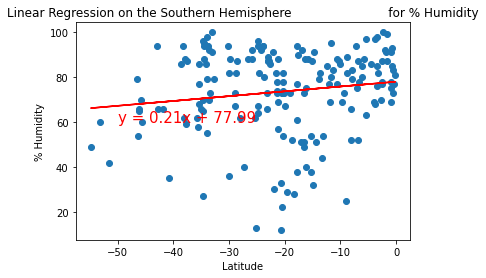

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

In [59]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

77.99098203859488 2.6120451781697325


In [60]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.021958


## Correlation Latitude and Wind Speed

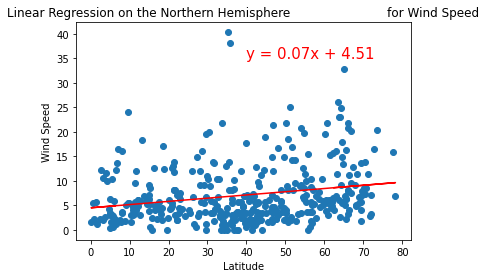

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [63]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

4.507572374437317 0.6484049798715673


In [64]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.047714


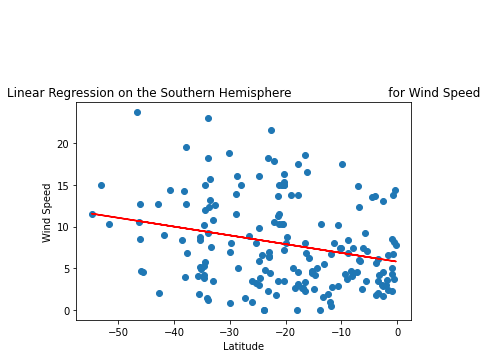

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [66]:
result = linregress(x_values, y_values)
print(result.intercept, result.intercept_stderr)

5.794267971625477 0.7138751615806236


In [67]:
res = linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.067266
